<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
data = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop('sales', axis=1)

In [ ]:
y = df['sales']

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [ ]:
poly_features = polynomial_converter.transform(X)
poly_features.shape

(200, 9)

In [ ]:
X.shape

(200, 3)

In [ ]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [ ]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4896798044803838

In [ ]:
MSE = mean_squared_error(y_test, test_predictions)

In [ ]:
root_MSE = np.sqrt(MSE)
root_MSE

0.6646431757269274

In [ ]:
# create the different order poly
# split poly features train/test
# fit on train
# store/save the rmse for BOTH train and test
# Plot the results (errors vs poly order)

In [ ]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
  polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = polynomial_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

  model = LinearRegression()
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_error = np.sqrt(mean_squared_error(y_train, train_pred))
  test_error = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_errors.append(train_error)
  test_rmse_errors.append(test_error)

In [ ]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020673,
 0.35170836883993495,
 0.2509342964085938,
 0.19416302767081192,
 5.421506740110851,
 0.14639313796421172,
 0.16669349723147106]

In [ ]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825236476,
 0.5077742639859423,
 2.5758223594965197,
 4.310389958991024,
 1379.5760739323696,
 3881.913541154056,
 92670.68400656343]

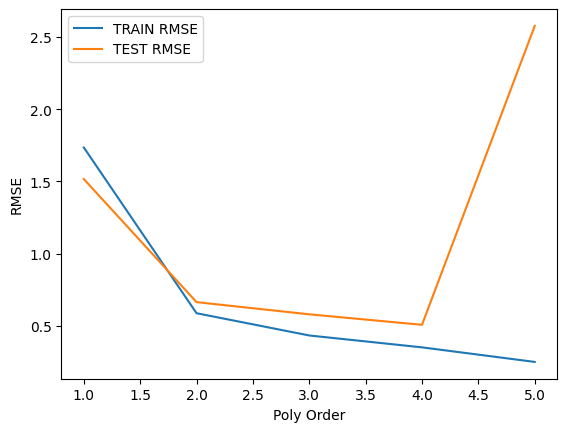

In [ ]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Poly Order')
plt.legend()


In [ ]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
final_model = LinearRegression()

In [ ]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [ ]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [ ]:
loaded_converter = load('final_poly_converter.joblib')

In [ ]:
loaded_model = load('final_model.joblib')

In [ ]:
campaign = [[149, 22, 12]]

In [ ]:
transformed_data = loaded_converter.fit_transform(campaign)

In [ ]:
loaded_model.predict(transformed_data)

array([14.64501014])

Regularization Data Setup

In [ ]:
df = pd.read_csv('Advertising.csv')
X = df.drop('sales', axis=1)
y = df['sales']

poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
test_predictions = ridge_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1.5161875681803985

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)
test_predictions = ridge_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
# MAE
# ridge_cv_model.alpha_
# ridge_cv_model.coef_
# ridge_cv_model.best_score_
RMSE

1.5161522927593722

In [ ]:
ridge_cv_model.best_score_

-1.2999778458679445

L1 Regularization (Lasso)

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)
lasso_cv_model.fit(X_train, y_train)
test_predictions = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1.2151556695813133

In [ ]:
lasso_cv_model.alpha_

163.0730225425898

In [ ]:
lasso_cv_model.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.74491853e-05,
        1.29757848e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)
elastic_cv_model.fit(X_train, y_train)
test_predictions = elastic_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1.2151556695813133

In [ ]:
elastic_cv_model.l1_ratio_

1.0

In [ ]:
elastic_cv_model.alpha_

163.0730225425898

In [ ]:
elastic_cv_model.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.74491853e-05,
        1.29757848e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])